# Visualization

![visualize_packages](img/visualize_packages.png)

## Plots

[Home · Plots (juliaplots.org)](https://docs.juliaplots.org/stable/)

Plots 可以使用同样的绘图语法，在后台调用多种绘图引擎，如 GR、PythonPlot、PlotlyJS、PGFPlotsX，不同引擎的绘图效果不同。

- GR 绘制 3D 图有时效果不佳，需要添加参数 `display_option=Plots.GR.OPTION_SHADED_MESH`
- PlotlyJS 无法在 Jupyter 中使用，有一套自己的语法

In [1]:
using Plots
# gr() 

### 直接接收函数

除了接收两个向量（画散点图），`plot()`还可以接收函数、定义域两端点作为参数，绘制函数的图象

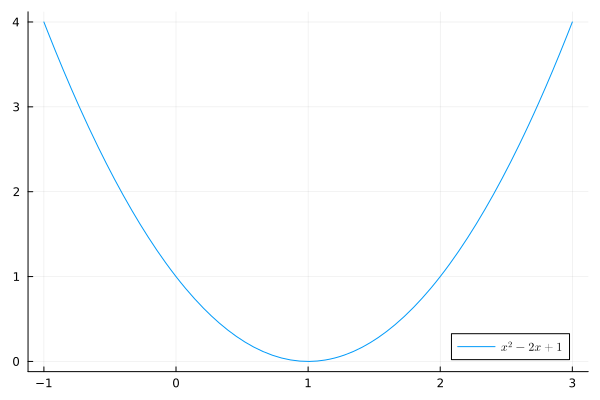

In [2]:
using LaTeXStrings

f1 = x -> x^2 - 2x + 1
plot(f1, -1, 3, label=L"x^2-2x+1")

### 中文

要自己设置好中文字体

```julia
# pythonplot()
ENV["GKS_ENCODING"] = "utf-8"
default(fontfamily="SimHei")
```

### title and labels

多个数据系列，包括其标签、格式，都在行方向上并列排列，传递给 `plot()`

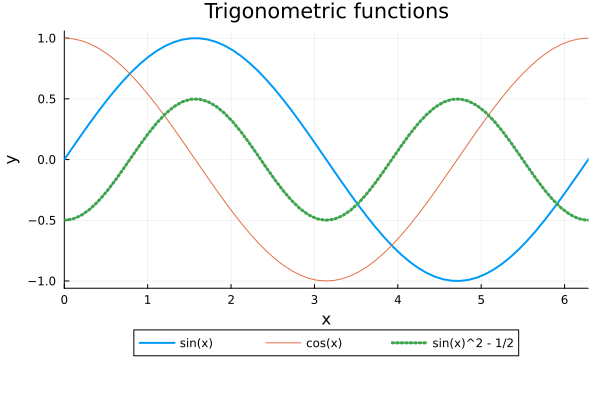

In [3]:
x = range(0, 10, length=100)
y1 = sin.(x)
y2 = cos.(x)
y3 = @. sin(x)^2 - 1 / 2

plot(x, [y1 y2], label=["sin(x)" "cos(x)"], lw=[2 1])
plot!(x, y3, label="sin(x)^2 - 1/2", lw=3, ls=:dot)
plot!(legend=:outerbottom, legendcolumns=3)
xlims!(0, 2pi)
title!("Trigonometric functions")
xlabel!("x")
ylabel!("y")

### Axis

`xlims = (low, high)`指定x轴范围， `xticks`指定x轴刻度线位置， `xscale=:log`指定x轴对数刻度， `xflip=true`指定坐标轴反转方向，用`grid=false`取消网格线。


#### 两个y轴分居两侧

```julia
plot(X, Y1)
plot!(twinx(), X, Y2)
```

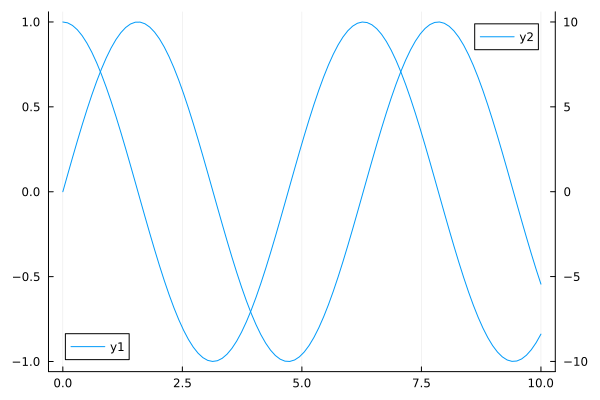

In [4]:
x = range(0, 10, length=100)
y1 = sin.(x)
y2 = 10 .* cos.(x)

plot(x, y1)
plot!(twinx(), x, y2)

### Output

```julia
savefig(filename_string) # save the most recent fig as filename_string (such as "output.png")
savefig(plot_ref, filename_string) # save the fig referenced by plot_ref as filename_string (such as "output.png")
```

前一个函数保存最近绘制的图，后一个函数保存任何被命名的图

`filename_string` 是要保存的路径

### LaTeX Equations

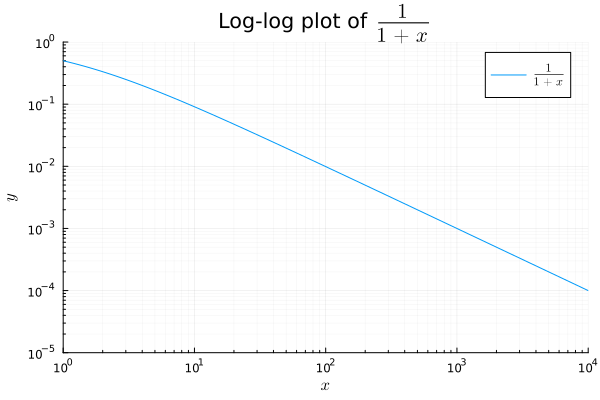

In [5]:
using LaTeXStrings

x = 10 .^ range(0, 4, length=100)
y = @. 1 / (1 + x)

plot(x, y, label=L"\frac{1}{1+x}")
plot!(xscale=:log10, yscale=:log10, minorgrid=true)
xlims!(1e+0, 1e+4)
ylims!(1e-5, 1e+0)
title!(L"Log-log plot of $\frac{1}{1+x}$")
xlabel!(L"x")
ylabel!(L"y")

### Contours 等值线图

- 可以用 `contour(xs, ys, f)`
- 也可以用 `contour(xs, ys, @. f(xs', ys))`

In [6]:
f(x1,x2) = sin(x1 + x2) + cos(x1)^2
xs = range(-3, 1, length = 40)
ys = range(-2, 1, length = 40)
z = @. f(xs', ys) # xs要转置，算出每个交点的z坐标

40×40 Matrix{Float64}:
 1.93901     1.92449      1.88113     1.81116    …  -0.50347     -0.549544
 1.95797     1.93572      1.88451     1.80666       -0.466149    -0.505535
 1.97115     1.94108      1.88198     1.79628       -0.423772    -0.45681
 1.97847     1.94052      1.87355     1.78007       -0.376588    -0.403656
 1.97988     1.93405      1.85927     1.75813       -0.324876    -0.346389
 1.97538     1.92171      1.83923     1.73059    …  -0.268944    -0.285346
 1.965       1.90358      1.81354     1.69761       -0.20912     -0.220889
 1.94879     1.87976      1.78236     1.65939       -0.14576     -0.1534
 1.92685     1.85039      1.74586     1.61616       -0.0792379   -0.0832761
 1.89931     1.81564      1.70427     1.56817       -0.00994699  -0.0109336
 1.86633     1.77573      1.65784     1.5157     …   0.0617028    0.0632002
 1.82811     1.73088      1.60683     1.45906        0.135288     0.138687
 1.78488     1.68136      1.55155     1.3986         0.210372     0.215079
 ⋮

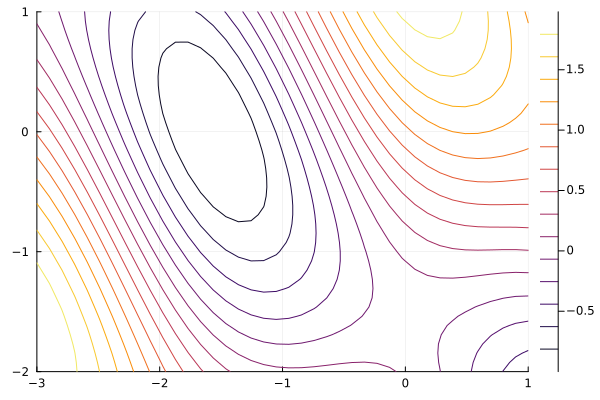

In [7]:
contour(xs, ys, z)

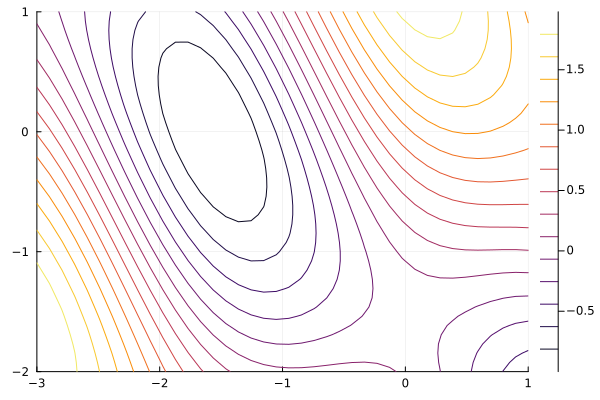

In [8]:
contour(xs, ys, f)

### 3D scatter

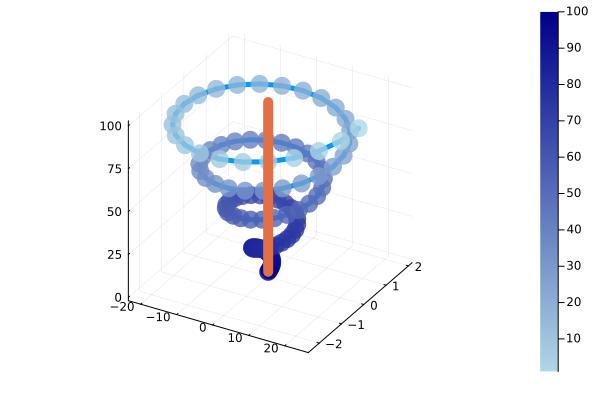

In [9]:
n = 100
ts = range(0, stop=8π, length=n)
z = 1:n

# 在 plot() 中依次输入点集的 x 坐标数组、y 坐标数组、z 坐标数组
p = plot(
    ts .* map(cos, ts), # x 坐标
    (0.1ts) .* map(sin, ts), # y 坐标
    z, # z 坐标
    zcolor=reverse(z),
    m=(10, 0.8, :blues, Plots.stroke(0)), # scatters 的样式
    leg=false, # 图例
    cbar=true, # color bar
    w=5 # 串联起 scatters 的 line 的粗细
)
plot!(p, zeros(n), zeros(n), 1:n, w=10) # 在 x = 0, y = 0 处添加一个z轴     # saves the CURRENT_PLOT as a .png
p

### 3D surface

`surface(x定义域，y定义域，函数名)`即可，而无需交叉遍历两个维度的定义域

In [19]:
pgfplotsx()

xs = collect(0.1:0.05:2.0)
ys = collect(0.2:0.1:2.0)
Z = function(x, y)
    1 / x + y * x^2
end

surface(xs, ys, Z, title="3D surface", xlabel="xlabel", ylabel="ylabel", zlabel="zlabel")

ErrorException: Invalid pgf key PGFPlotsX.Options(OrderedCollections.OrderedDict{String, Any}("color" => RGBA{Float64}(0.0,0.0,0.0,1.0), "draw opacity" => 1.0, "line width" => 1, "solid" => nothing), false)

传统写法：
```{julia}
xs = collect(0.1:0.05:2.0)
ys = collect(0.2:0.1:2.0)

# 交叉遍历两个未知数的定义域，扩展为两个长向量
X = [x for x in xs for _ in ys]
Y = [y for _ in xs for y in ys]

# 计算每个交点的高度，也是一个长向量
Z = function(x, y)
    1 / x + y * x^2
end
output =  Z.(X, Y)

# 将三个长向量给 surface，用以绘图
surface(X, Y, output)
```

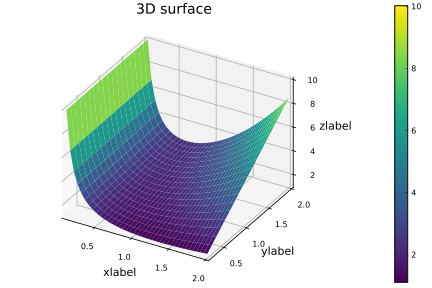

In [15]:
pythonplot()
surface(xs, ys, Z, 
    title="3D surface", xlabel="xlabel", ylabel="ylabel", zlabel="zlabel", 
    c=:viridis
)

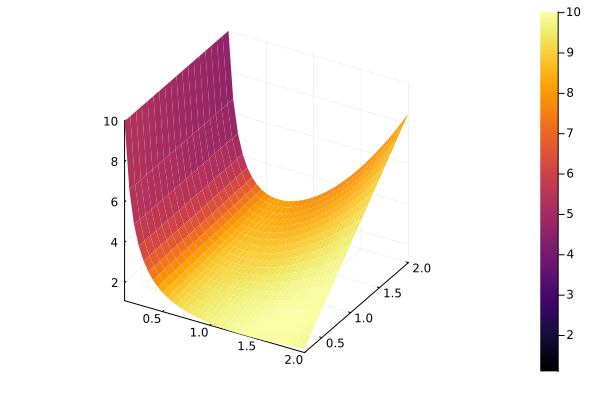

In [16]:
gr()
surface(xs, ys, Z, 
    display_option=Plots.GR.OPTION_SHADED_MESH
)

In [15]:
# plotlyjs()
# surface(xs, ys, Z)

### 3D wireframe

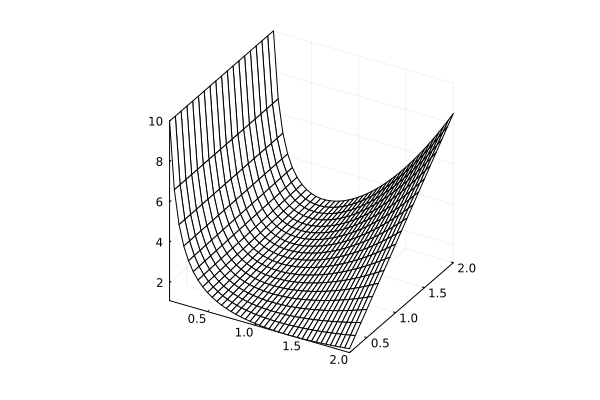

In [17]:
gr()
wireframe(xs, ys, Z)

### 添加辅助线

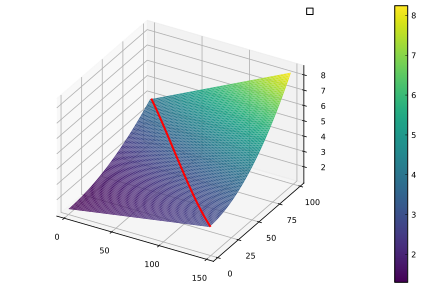

In [48]:
# plotlyjs()
pythonplot()

att_domain = range(0, step=1.5, length=100) # attack bonus
crit_domain = range(0, step=1, length=100) # critical hit rate
extra_att = 0.3
output = (att, crit) ->
    (1 + att / 100 + extra_att) * (1 - crit / 100 + (crit / 100) * (1 + 2 * crit / 100)) # 爆伤取暴击的2倍
p = surface(
    att_domain, crit_domain, output,
    c=:viridis
)

# 约束为一条直线，这条线上哪一点取得最大值？
att_margin = range(1, step=1.5, length=100) |> collect
crit_margin = @. 100 - att_margin / 1.5
plot!(p,
    att_margin, crit_margin, output.(att_margin, crit_margin),
    label="constraint", c="red", w=2
)

### 3D mesh

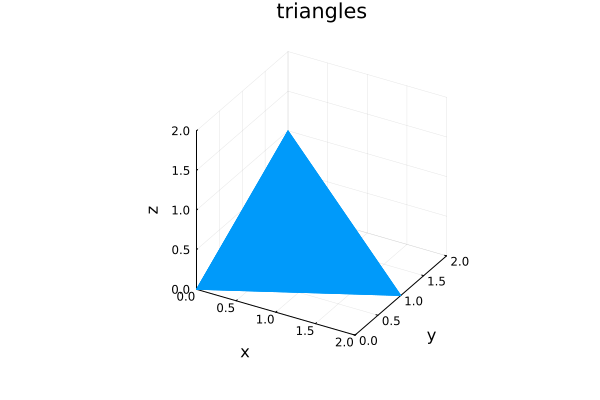

In [24]:
gr()

x = [0, 1, 2, 0]
y = [0, 0, 1, 2]
z = [0, 2, 0, 1]
i = [0, 0, 0, 1]
j = [1, 2, 3, 2]
k = [2, 3, 1, 3]
mesh3d(x, y, z; connections=(i, j, k), title="triangles", xlabel="x", ylabel="y", zlabel="z", legend=:none, margin=2 * Plots.mm)

### 3D axis flip / mirror

In [75]:
gr()

using LinearAlgebra
with(scalefonts=0.5) do
    (x, y) = (collect(-6:0.5:10), collect(-8:0.5:8))
    args = (x, y, ((x, y) -> begin
        sinc(norm([x, y]) / π)
    end))
    kw = (xlabel="x", ylabel="y", zlabel="z", grid=true, minorgrid=true)
    plots = [wireframe(args..., title="wire"; kw...)]
    for ax = (:x, :y, :z)
        push!(plots, wireframe(args..., title="wire-flip-$(ax)", xflip=ax === :x, yflip=ax === :y, zflip=ax === :z; kw...))
    end
    for ax = (:x, :y, :z)
        push!(plots, wireframe(args..., title="wire-mirror-$(ax)", xmirror=ax === :x, ymirror=ax === :y, zmirror=ax === :z; kw...))
    end
    plot(plots..., layout=@layout([_ ° _; ° ° °; ° ° °]), margin=0 * Plots.px)
end

## Gadfly

语法：
```julia
p1 = GadFly.plot(data::DataFrame, mapping::Dict, elements::Element)
```

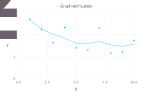

In [7]:
using Gadfly, Cairo
Gadfly.push_theme(:default)

x = 1:10
y = 10 .^rand(10)

Gadfly.plot(x=x, y=y, 
    Scale.y_sqrt, 
    Geom.point, Geom.smooth,
    Guide.xlabel("X"), Guide.ylabel("Y"), Guide.title("Graph with Labels"))

In [ ]:
using RDatasets # Jupyter 中无法使用 RDatasets，终端可以正常运行

Gadfly.plot(dataset("datasets", "iris"),
    x=:SepalLength, y=:SepalWidth,
    color = :Species, shape = :Species,
    Geom.point,
    Theme(point_size = 3pt))
Gadfly.plot(x = randn(4000), Geom.histogram(bincount = 100))

p1 = Gadfly.plot(dataset("mlmRev", "Gcsemv"),
    x=:Course, color=:Gender,
    Geom.histogram)

p1

# draw(PS("./fig/dswj_plot1.eps", 197mm, 141mm), p1)

## PlotlyJS

https://plotly.com/julia/

- 优点：基于 HTML，可以交互操作
- 缺点：在绘制 3D 图方面有缺陷。

In [ ]:
using PlotlyJS, CSV, DataFrames # PlotlyJS 似乎无法在 Jupyter 中运行
# WARNING: using PlotlyJS.dataset in module Main conflicts with an existing identifier.

### Scatter

In [ ]:

# figure1
plot(scatter(x=1:10, y=rand(10), mode="markers"))

# figure2
df = dataset(DataFrame, "iris")
plot(scatter(df, x=:sepal_width, y=:sepal_length, mode="markers"))

# figure3
plot(
    df,
    x=:sepal_width, y=:sepal_length, color=:species,
    marker=attr(
        size=:petal_length,
        sizeref=maximum(df.petal_length) / (20^2),
        sizemode="area"
    ),
    mode="markers"
)


# figure4
df = dataset(DataFrame, "gapminder")
df_ocean = df[df.continent.=="Oceania", :]
plot(
    df_ocean, x=:year, y=:lifeExp, color=:country, mode="lines"
)


# figure5
N = 100000
plot(scattergl(
    x=randn(N), y=randn(N), mode="markers",
    marker=attr(color=randn(N), colorscale="Viridis", line_width=1)
))

### Save Image

In [ ]:
using Random
Random.seed!(42)

N = 100
random_x = range(0, stop=1, length=N)
random_y0 = randn(N) .+ 5
random_y1 = randn(N)
random_y2 = randn(N) .- 5

p = plot([
    scatter(x=random_x, y=random_y0, mode="markers", name="markers"),
    scatter(x=random_x, y=random_y1, mode="lines", name="lines"),
    scatter(x=random_x, y=random_y2, mode="markers+lines", name="markers+lines")
])

open("./img/example.html", "w") do io
    PlotlyBase.to_html(io, p.plot,
        full_html=false,
        default_width="800px", default_height="600px"
    )
end

### 3D scatter

In [ ]:
# 传递给 plot() 的数据没有组织为数据框
n = 100
ts = range(0, stop=8π, length=n)
z = 1:n
plot(
    scatter(
        x=ts .* map(cos, ts),
        y=(0.1ts) .* map(sin, ts),
        z=z,
        mode="markers",
        marker=attr(
            size=12,
            color=ts,
            colorscale="Viridis",   # choose a colorscale
            opacity=0.8
        ),
        type="scatter3d"
    ),
    Layout(margin=attr(l=0, r=0, b=0, t=0))
)

In [ ]:
# 将数据框传给 plot()
df = dataset(DataFrame, "iris")
plot(
    df,
    x=:sepal_length, y=:sepal_width, z=:petal_width, color=:species,
    type="scatter3d", mode="markers",
    marker_size=:petal_length,
    marker_sizeref=0.3,
    Layout(margin=attr(l=0, r=0, b=0, t=0))
)